In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import seaborn as sns
import numpy as np


**Data:**

I utilized NYPD Shootings Reports data to gather information on reported shootings throughout New York City on
a daily basis. I also requested weather data from https://www.noaa.gov/ for historical daily weather in Central Park
for the given dates within the NYPD Report (1/1/2006 - 12/31/2020). The weather data had many more columns which were
not needed for this project so I worked on them in Excel (dropped columns like wind speed and direction and addad a TAvg column which found the daily
average temp given the Max and Min). This data will need to be uploaded into the notebook and will be provided within 
the folder (tempData.csv).

In [ ]:
!curl https://data.cityofnewyork.us/api/views/833y-fsy8/rows.csv?accessType=DOWNLOAD -o shooting.csv


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4995k    0 4995k    0     0  1582k      0 --:--:--  0:00:03 --:--:-- 1582k


In [ ]:
data = pd.read_csv("shooting.csv")
tempData = pd.read_csv("tempData.csv")


In [ ]:
data

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,24050482,08/27/2006,05:35:00,BRONX,52,0.0,NaN,True,NaN,NaN,NaN,25-44,F,BLACK HISPANIC,1.017542e+06,255918.875000,40.869058,-73.879632,POINT (-73.87963173099996 40.86905819000003)
1,77673979,03/11/2011,12:03:00,QUEENS,106,0.0,NaN,False,NaN,NaN,NaN,65+,M,WHITE,1.027543e+06,186095.000000,40.677367,-73.843920,POINT (-73.84392019199998 40.677366895000034)
2,203350417,10/06/2019,01:09:00,BROOKLYN,77,0.0,NaN,False,NaN,NaN,NaN,18-24,F,BLACK,9.953250e+05,185155.000000,40.674886,-73.960075,POINT (-73.96007501899999 40.674885741000026)
3,80584527,09/04/2011,03:35:00,BRONX,40,0.0,NaN,False,NaN,NaN,NaN,<18,M,BLACK,1.007453e+06,233952.000000,40.808798,-73.916184,POINT (-73.91618413199996 40.80879780500004)
4,90843766,05/27/2013,21:16:00,QUEENS,100,0.0,NaN,False,NaN,NaN,NaN,18-24,M,BLACK,1.041267e+06,157133.515625,40.597796,-73.794686,POINT (-73.79468553799995 40.597796249000055)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23580,186329304,08/12/2018,19:50:00,BROOKLYN,84,0.0,NaN,False,25-44,M,BLACK,65+,M,BLACK,9.891547e+05,193164.265625,40.696875,-73.982314,POINT (-73.98231375199998 40.69687491500008)
23581,29277330,05/26/2007,04:57:00,BROOKLYN,81,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,1.005218e+06,190528.000000,40.689615,-73.924393,POINT (-73.92439311199996 40.689615497000034)
23582,77443443,02/25/2011,01:12:00,BROOKLYN,81,0.0,MULTI DWELL - APT BUILD,False,18-24,M,BLACK,<18,M,BLACK,1.003999e+06,187611.031250,40.681612,-73.928798,POINT (-73.92879814299994 40.681611891000045)
23583,176027888,03/17/2018,00:46:00,BRONX,43,0.0,NaN,False,25-44,M,UNKNOWN,25-44,M,WHITE HISPANIC,1.018728e+06,242744.234375,40.832893,-73.875408,POINT (-73.87540796899998 40.83289318000004)


In [ ]:
data.dtypes

INCIDENT_KEY                 int64
OCCUR_DATE                  object
OCCUR_TIME                  object
BORO                        object
PRECINCT                     int64
JURISDICTION_CODE          float64
LOCATION_DESC               object
STATISTICAL_MURDER_FLAG       bool
PERP_AGE_GROUP              object
PERP_SEX                    object
PERP_RACE                   object
VIC_AGE_GROUP               object
VIC_SEX                     object
VIC_RACE                    object
X_COORD_CD                 float64
Y_COORD_CD                 float64
Latitude                   float64
Longitude                  float64
Lon_Lat                     object
dtype: object

In [ ]:
tempData

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN
0,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,1/1/2006,0.00,0.0,0.0,37.0,42,32
1,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,1/2/2006,0.63,0.0,0.0,43.5,48,39
2,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,1/3/2006,1.13,0.0,0.0,36.5,40,33
3,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,1/4/2006,0.00,0.0,0.0,33.5,38,29
4,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,1/5/2006,0.05,0.0,0.0,43.5,50,37
...,...,...,...,...,...,...,...,...,...,...,...,...
5813,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,12/1/2021,0.00,0.0,0.0,44.5,49,40
5814,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,12/2/2021,0.04,0.0,0.0,51.5,58,45
5815,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,12/3/2021,0.00,0.0,0.0,42.5,48,37
5816,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,12/4/2021,0.00,0.0,0.0,42.0,48,36


In [ ]:
tempData.dtypes

STATION       object
NAME          object
LATITUDE     float64
LONGITUDE    float64
ELEVATION    float64
DATE          object
PRCP         float64
SNOW         float64
SNWD         float64
TAVG         float64
TMAX           int64
TMIN           int64
dtype: object

In the next steps I set the 'OCCUR_DATE' column to be a datetime and set it as the index. Upon further analysis I realize this is a problem because multiple shootings happen on the same day. This means the index is not unique. I still need the individual shootings to utilize each Lat and Lon for geospacial analysis later. This is fixed in the next few cells. Also, before I set the index as the date, I pull dates to other dataframes such as data06 or data20 which has data corresponding to only that year.

In [ ]:
#Setting occur_date to dateTime for time series analysis

data['OCCUR_DATE'] = pd.to_datetime(data['OCCUR_DATE'])

In [ ]:
data

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,24050482,2006-08-27,05:35:00,BRONX,52,0.0,NaN,True,NaN,NaN,NaN,25-44,F,BLACK HISPANIC,1.017542e+06,255918.875000,40.869058,-73.879632,POINT (-73.87963173099996 40.86905819000003)
1,77673979,2011-03-11,12:03:00,QUEENS,106,0.0,NaN,False,NaN,NaN,NaN,65+,M,WHITE,1.027543e+06,186095.000000,40.677367,-73.843920,POINT (-73.84392019199998 40.677366895000034)
2,203350417,2019-10-06,01:09:00,BROOKLYN,77,0.0,NaN,False,NaN,NaN,NaN,18-24,F,BLACK,9.953250e+05,185155.000000,40.674886,-73.960075,POINT (-73.96007501899999 40.674885741000026)
3,80584527,2011-09-04,03:35:00,BRONX,40,0.0,NaN,False,NaN,NaN,NaN,<18,M,BLACK,1.007453e+06,233952.000000,40.808798,-73.916184,POINT (-73.91618413199996 40.80879780500004)
4,90843766,2013-05-27,21:16:00,QUEENS,100,0.0,NaN,False,NaN,NaN,NaN,18-24,M,BLACK,1.041267e+06,157133.515625,40.597796,-73.794686,POINT (-73.79468553799995 40.597796249000055)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23580,186329304,2018-08-12,19:50:00,BROOKLYN,84,0.0,NaN,False,25-44,M,BLACK,65+,M,BLACK,9.891547e+05,193164.265625,40.696875,-73.982314,POINT (-73.98231375199998 40.69687491500008)
23581,29277330,2007-05-26,04:57:00,BROOKLYN,81,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,1.005218e+06,190528.000000,40.689615,-73.924393,POINT (-73.92439311199996 40.689615497000034)
23582,77443443,2011-02-25,01:12:00,BROOKLYN,81,0.0,MULTI DWELL - APT BUILD,False,18-24,M,BLACK,<18,M,BLACK,1.003999e+06,187611.031250,40.681612,-73.928798,POINT (-73.92879814299994 40.681611891000045)
23583,176027888,2018-03-17,00:46:00,BRONX,43,0.0,NaN,False,25-44,M,UNKNOWN,25-44,M,WHITE HISPANIC,1.018728e+06,242744.234375,40.832893,-73.875408,POINT (-73.87540796899998 40.83289318000004)


In [ ]:
start_date = '01/01/2006'
end_date = '12/31/2006'
start07= '01/01/2007'
end07='12/31/2007'
start19='01/01/2019'
end19='12/31/2019'
start20='01/01/20'
end20='12/31/2020'

In [ ]:
#Dropping all the extra columns that are not needed for this project


data = data.drop(columns = ['OCCUR_TIME', 'PRECINCT', 'JURISDICTION_CODE', 'LOCATION_DESC',
                            'PERP_AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'VIC_AGE_GROUP', 'VIC_SEX'
                            ,'VIC_RACE', 'X_COORD_CD', 'Y_COORD_CD'])

In [ ]:
mask06 = (data['OCCUR_DATE'] > start_date) & (data['OCCUR_DATE'] <= end_date)
data07 = data[(data['OCCUR_DATE'] > start07) & (data['OCCUR_DATE'] <= end07)]
data19 = data[(data['OCCUR_DATE'] > start19) & (data['OCCUR_DATE'] <= end19)]
data20 = data[(data['OCCUR_DATE'] > start20) & (data['OCCUR_DATE'] <= end20)]

In [ ]:
data06 = data[mask06]

In [ ]:
data06

,INCIDENT_KEY,OCCUR_DATE,BORO,STATISTICAL_MURDER_FLAG,Latitude,Longitude,Lon_Lat
0,24050482,2006-08-27,BRONX,True,40.869058,-73.879632,POINT (-73.87963173099996 40.86905819000003)
15,24378757,2006-09-18,BROOKLYN,False,40.633547,-73.909761,POINT (-73.90976077999994 40.63354665900005)
24,16631511,2006-06-01,BROOKLYN,False,40.669406,-73.863641,POINT (-73.86364087499999 40.66940550700008)
25,16814011,2006-06-13,BROOKLYN,True,40.641940,-73.958408,POINT (-73.95840837999998 40.641939543000035)
34,23564122,2006-07-26,BROOKLYN,True,40.671107,-73.881433,POINT (-73.88143295699996 40.67110691100004)
...,...,...,...,...,...,...,...
23476,23822599,2006-08-11,BRONX,False,40.830099,-73.848165,POINT (-73.84816485999994 40.83009896000004)
23497,24839844,2006-10-17,MANHATTAN,False,40.740887,-73.990070,POINT (-73.99007039899993 40.740887343000054)
23507,24360988,2006-09-17,MANHATTAN,False,40.815684,-73.943537,POINT (-73.94353709299997 40.815683586000034)
23514,25932835,2006-12-25,BROOKLYN,False,40.681412,-73.927258,POINT (-73.92725770199996 40.68141197400007)


In [ ]:
data.set_index('OCCUR_DATE', inplace=True)
data06.set_index('OCCUR_DATE', inplace=True)
data07.set_index('OCCUR_DATE', inplace=True)
data19.set_index('OCCUR_DATE', inplace=True)
data20.set_index('OCCUR_DATE', inplace=True)

In [ ]:
data

,INCIDENT_KEY,BORO,STATISTICAL_MURDER_FLAG,Latitude,Longitude,Lon_Lat
OCCUR_DATE,,,,,,
2006-08-27,24050482,BRONX,True,40.869058,-73.879632,POINT (-73.87963173099996 40.86905819000003)
2011-03-11,77673979,QUEENS,False,40.677367,-73.843920,POINT (-73.84392019199998 40.677366895000034)
2019-10-06,203350417,BROOKLYN,False,40.674886,-73.960075,POINT (-73.96007501899999 40.674885741000026)
2011-09-04,80584527,BRONX,False,40.808798,-73.916184,POINT (-73.91618413199996 40.80879780500004)
2013-05-27,90843766,QUEENS,False,40.597796,-73.794686,POINT (-73.79468553799995 40.597796249000055)
...,...,...,...,...,...,...
2018-08-12,186329304,BROOKLYN,False,40.696875,-73.982314,POINT (-73.98231375199998 40.69687491500008)
2007-05-26,29277330,BROOKLYN,False,40.689615,-73.924393,POINT (-73.92439311199996 40.689615497000034)
2011-02-25,77443443,BROOKLYN,False,40.681612,-73.928798,POINT (-73.92879814299994 40.681611891000045)


In [ ]:
data06

,INCIDENT_KEY,BORO,STATISTICAL_MURDER_FLAG,Latitude,Longitude,Lon_Lat
OCCUR_DATE,,,,,,
2006-08-27,24050482,BRONX,True,40.869058,-73.879632,POINT (-73.87963173099996 40.86905819000003)
2006-09-18,24378757,BROOKLYN,False,40.633547,-73.909761,POINT (-73.90976077999994 40.63354665900005)
2006-06-01,16631511,BROOKLYN,False,40.669406,-73.863641,POINT (-73.86364087499999 40.66940550700008)
2006-06-13,16814011,BROOKLYN,True,40.641940,-73.958408,POINT (-73.95840837999998 40.641939543000035)
2006-07-26,23564122,BROOKLYN,True,40.671107,-73.881433,POINT (-73.88143295699996 40.67110691100004)
...,...,...,...,...,...,...
2006-08-11,23822599,BRONX,False,40.830099,-73.848165,POINT (-73.84816485999994 40.83009896000004)
2006-10-17,24839844,MANHATTAN,False,40.740887,-73.990070,POINT (-73.99007039899993 40.740887343000054)
2006-09-17,24360988,MANHATTAN,False,40.815684,-73.943537,POINT (-73.94353709299997 40.815683586000034)


In [ ]:
data07

,INCIDENT_KEY,BORO,STATISTICAL_MURDER_FLAG,Latitude,Longitude,Lon_Lat
OCCUR_DATE,,,,,,
2007-05-31,29357208,BRONX,True,40.878493,-73.864012,POINT (-73.86401191799996 40.87849267400003)
2007-03-19,27500997,BROOKLYN,False,40.671107,-73.881433,POINT (-73.88143295699996 40.67110691100004)
2007-08-24,33977870,BROOKLYN,False,40.663054,-73.910972,POINT (-73.91097205999995 40.66305447500008)
2007-01-05,26103369,BRONX,True,40.842281,-73.868347,POINT (-73.86834749899998 40.842280749000054)
2007-02-06,26737159,BRONX,True,40.872362,-73.846458,POINT (-73.84645796599995 40.87236241900007)
...,...,...,...,...,...,...
2007-11-06,35532833,BROOKLYN,False,40.671254,-73.926715,POINT (-73.92671475399999 40.67125355700006)
2007-05-26,29246085,QUEENS,False,40.686659,-73.763903,POINT (-73.76390284099995 40.686658771000054)
2007-07-31,33600829,BRONX,False,40.837324,-73.919831,POINT (-73.91983075699994 40.83732351100008)


Next I create a pivot table to see the number of shootings per day. Within the next few steps I fix the issue where a shooting does not occur on a day, thus that date is not included in the dataset with a 0 value. Only dates with shooting is within the original dataset. I decided to fix this issue on pivot and not on data becasue data has multiple incidents on the same day, thus not a unique index. Pivot, being an agg of the values, will have unique dates for a group of incidents.

In [ ]:
pivot = pd.pivot_table(
    data = data,
    index = "OCCUR_DATE",
    values = "INCIDENT_KEY",
    aggfunc='count'
)

pivot

,INCIDENT_KEY
OCCUR_DATE,
2006-01-01,8
2006-01-02,4
2006-01-03,4
2006-01-04,4
2006-01-05,4
...,...
2020-12-27,6
2020-12-28,2
2020-12-29,5


In [ ]:
#Missing dates like 2012-02-03 and 2012-02-07

pivot['2012/02']

,INCIDENT_KEY
OCCUR_DATE,
2012-02-01,3
2012-02-02,3
2012-02-04,7
2012-02-05,11
2012-02-08,6
2012-02-10,3
2012-02-11,8
2012-02-13,7
2012-02-14,1


In [ ]:
pivot = pivot.asfreq('d')

In [ ]:
pivot = pivot.fillna(0)

In [ ]:
pivot['2012/02']

,INCIDENT_KEY
OCCUR_DATE,
2012-02-01,3.0
2012-02-02,3.0
2012-02-03,0.0
2012-02-04,7.0
2012-02-05,11.0
2012-02-06,0.0
2012-02-07,0.0
2012-02-08,6.0
2012-02-09,0.0


Next is a table depicting how many of the shootings where flagged as a murder. Statistical murder flag was described as "Shooting resulted in the victim’s death which would be counted as a murder"

In [ ]:
pivot2 = pd.pivot_table(
    data = data,
    index = "OCCUR_DATE",
    columns = ['STATISTICAL_MURDER_FLAG'],
    values = "INCIDENT_KEY",
    aggfunc='count',
    fill_value = 0
)

pivot2

STATISTICAL_MURDER_FLAG,False,True
OCCUR_DATE,,
2006-01-01,4,4
2006-01-02,3,1
2006-01-03,3,1
2006-01-04,4,0
2006-01-05,4,0
...,...,...
2020-12-27,5,1
2020-12-28,2,0
2020-12-29,3,2


In [ ]:
count = 0
for i in data['INCIDENT_KEY']:
  count = count + 1
count

23585

In [ ]:
pivot3 = pd.pivot_table(
    data = data,
    index = "BORO",    
    values = "INCIDENT_KEY",
    aggfunc='count',
    fill_value = 0
)

pivot3

,INCIDENT_KEY
BORO,
BRONX,6701
BROOKLYN,9734
MANHATTAN,2922
QUEENS,3532
STATEN ISLAND,696


In [ ]:
data['STATISTICAL_MURDER_FLAG'].sum()

4500

In [ ]:
rcParams['figure.figsize'] = (16, 6)


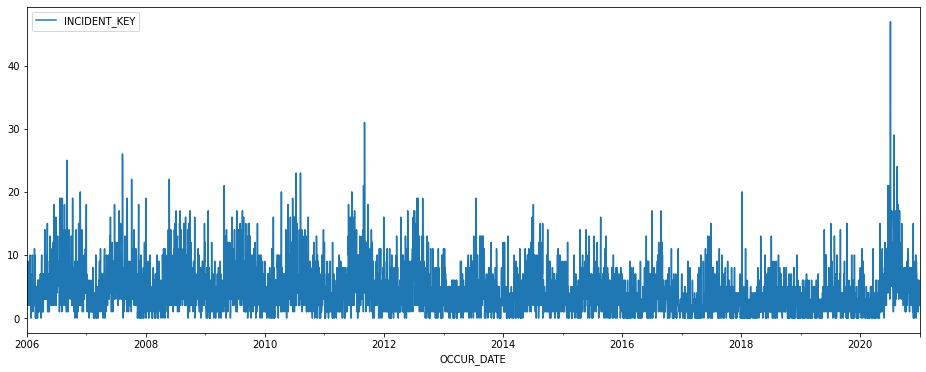

In [ ]:
pivot.plot()
plt.show()

#Plot showing the number of shootings per day from 2006 - 2020

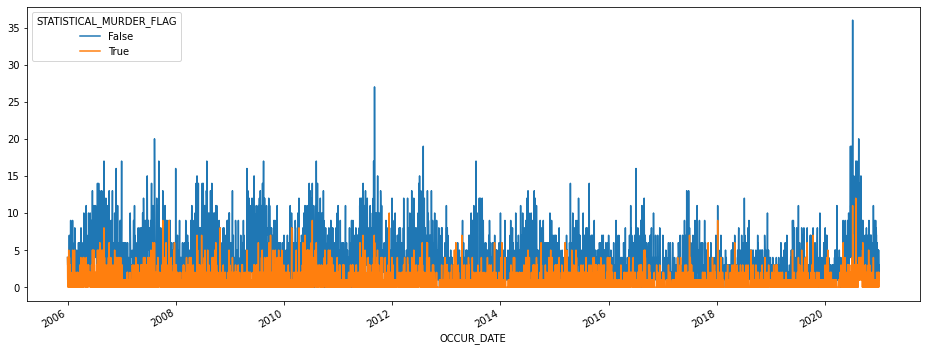

In [ ]:
pivot2.plot()
plt.show()

#Plot showing number of shootings (and statistical murder flag) from 2006 - 2020
#Quickly can notice spikes in 2011 and 2020, lets look at these years and the year before it


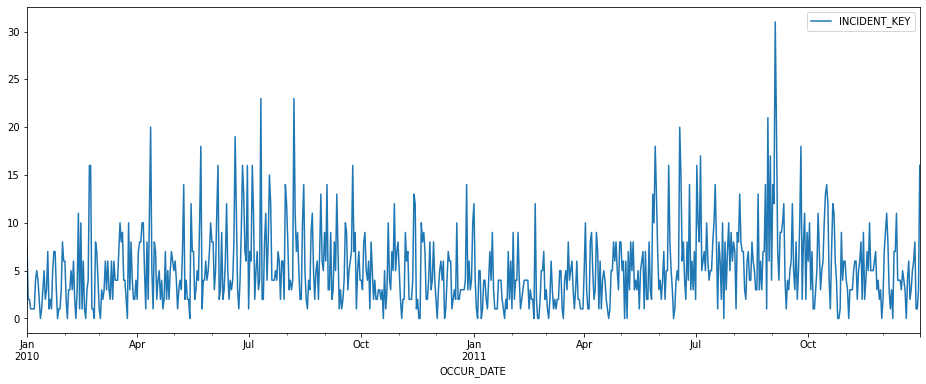

In [ ]:
#Difference between 2010 and 2011, indicating Sept spike

pivot['2010':'2011'].plot()
plt.show()

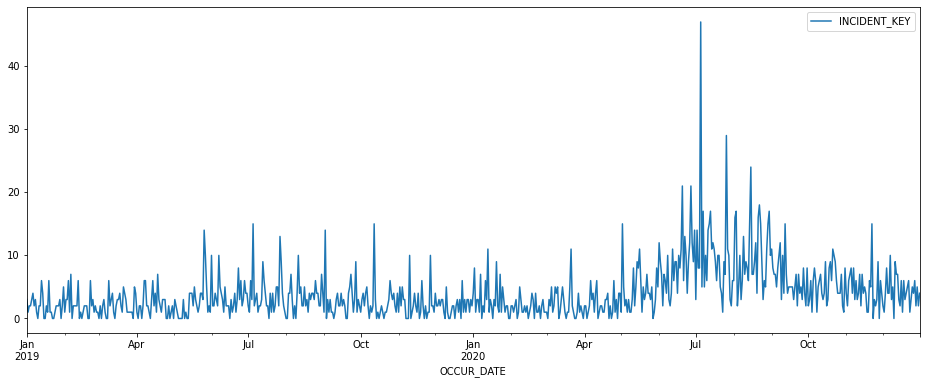

In [ ]:
#The difference between 2019 and 2020, indicating July Spike

pivot['2019':'2020'].plot()
plt.show()

From the graphs we can see up until 2020 shootings have been fairly consistent. There is an apparent rise in 2020 with an obvious spike at some point mid 2020. We can look into this further.

In [ ]:
pivot.max()

INCIDENT_KEY    47.0
dtype: float64

In [ ]:
pivot.min()

INCIDENT_KEY    0.0
dtype: float64

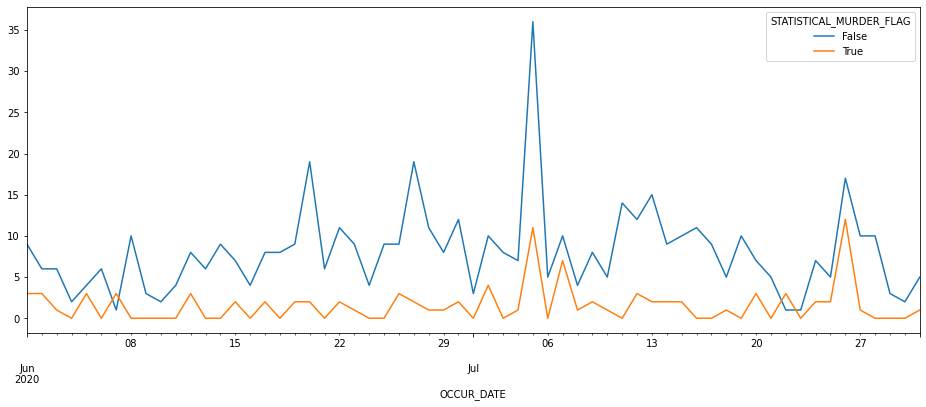

In [ ]:
pivot2['2020-06':'2020-07'].plot()

With the above graph we can see it's July 4th-5th when this huge spike takes place. Some research led to the following news articles:

https://nypost.com/2020/07/05/violent-july-4th-weekend-sees-at-least-10-shot-2-dead-in-nyc/

https://www.nbcnewyork.com/news/local/bullet-strikes-nypd-patrol-vehicle-misses-officers-sitting-inside/2500243/

We can also see while there is a rise in consistent shootings between mid June and mid July, the fatality rate stays relatively flat (besides the one spike on July 4th/5th).

In [ ]:
pivot['2020/07/04':'2020/07/05']

#Numbers from july 4th and july 5th of 2020, the major spike.

,INCIDENT_KEY
OCCUR_DATE,
2020-07-04,8.0
2020-07-05,47.0


In [ ]:
pivot2['2020/07/04':'2020/07/05']

#Murder numbers from the same dates

STATISTICAL_MURDER_FLAG,False,True
OCCUR_DATE,,
2020-07-04,7,1
2020-07-05,36,11


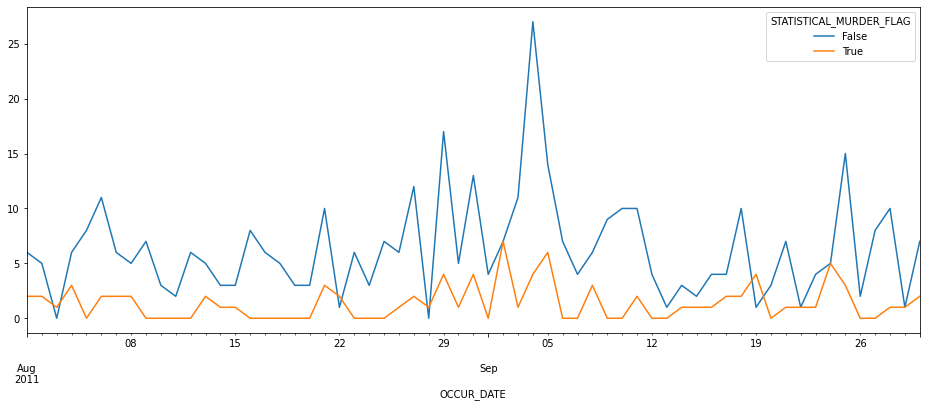

In [ ]:
#2011 spike

pivot2['2011-08':'2011-09'].plot()

We can see another huge spike over Labor Day weekend in September 2011. Again, while shooting incidents spiked, fatalities had much smaller corresponding spikes

https://www.nbcnewyork.com/news/local/labor-day-violence-new-york-city-shootings/1927858/

In [ ]:
pivot['2011/09/03':'2011/09/05']

,INCIDENT_KEY
OCCUR_DATE,
2011-09-03,12.0
2011-09-04,31.0
2011-09-05,20.0


In [ ]:
pivot2['2011/09/03':'2011/09/05']

STATISTICAL_MURDER_FLAG,False,True
OCCUR_DATE,,
2011-09-03,11,1
2011-09-04,27,4
2011-09-05,14,6


In [ ]:
#March - June of 2019
#Compared to March - June of 2020

print(pivot['2019/03':'2019/06'].sum())
print(pivot['2020/03':'2020/06'].sum())

INCIDENT_KEY    320.0
dtype: float64
INCIDENT_KEY    542.0
dtype: float64


Various months through the beginning of covid can be looked at with the above cell. I would have expected shootings to be lower with everyone mandated to stay at home but shootings were higher in March/April of 2020 than they were in 2019 (8 incidents higher). When including May there is about a 60 incident increase and with the inclusion of June the increase of shooting incidents rose to over 220 more incidents than the same period of the year prior.

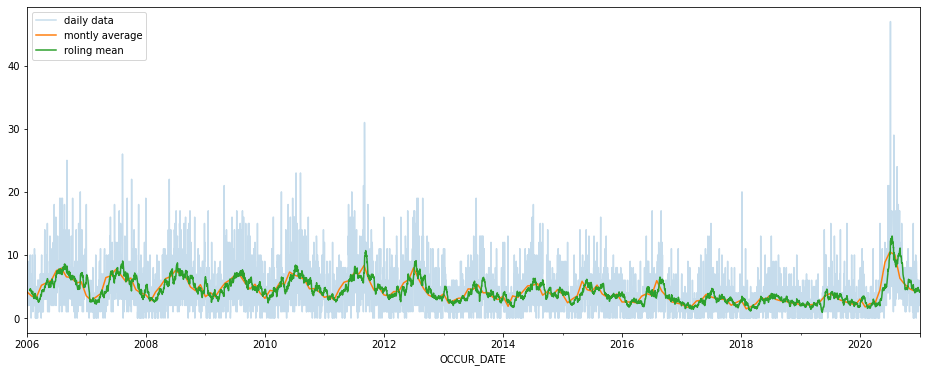

In [ ]:
#add text, graph 06-20
ax = pivot.plot(alpha=0.25)
pivot.resample('M').mean().plot(ax=ax)
pivot.rolling(20).mean().plot(ax=ax)
ax.legend(["daily data", "montly average", "roling mean"])
plt.show()

This is a graph of all the shooting incidents from 2006 - 2020. The incidents seems to have followed a consistent wave from 2006 until 2012 where it then had less severe apexes. From 2017-2019 the waves become relatively flat before the obvious spike in mid 2020.

Next is a graph of just 2019-2020 incidents

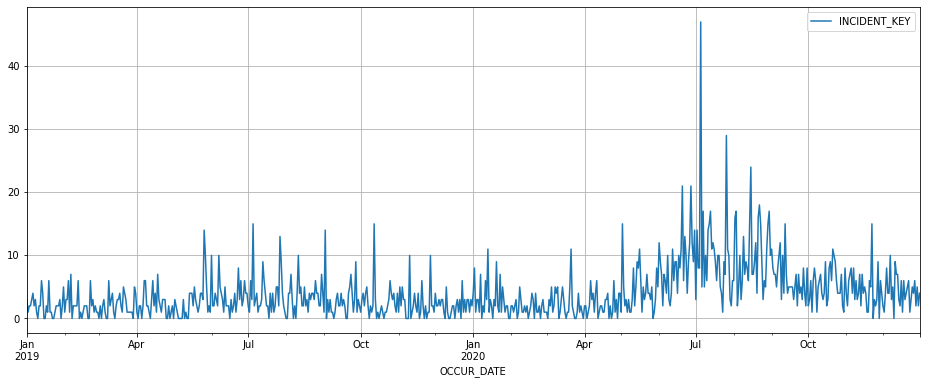

In [ ]:
pivot['2019':'2020'].plot(grid=True)

#see a huge rise in shootings from 2019 to 2020

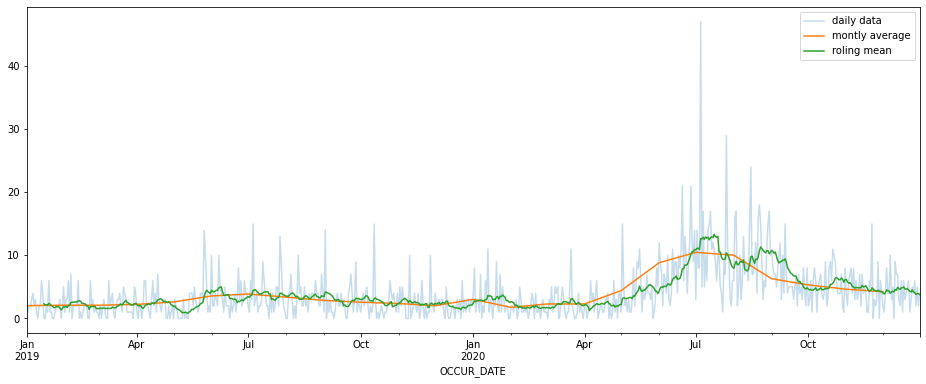

In [ ]:
ax = pivot['2019':'2020'].plot(alpha=0.25)
pivot['2019':'2020'].resample('M').mean().plot(ax=ax)
pivot['2019':'2020'].rolling(15).mean().plot(ax=ax)
ax.legend(["daily data", "montly average", "roling mean"])
plt.show()

In [ ]:
tempData['DATE'] = pd.to_datetime(tempData['DATE'])

In [ ]:
tempData.set_index('DATE', inplace=True)

In [ ]:
tempData = tempData.drop(columns=['STATION', 'NAME','LATITUDE', 'LONGITUDE', 'ELEVATION'])

In [ ]:
maxRain = tempData['PRCP'].max()
print("Max Rainfall: ", maxRain) 
print('Max Rainfall Date:', tempData.index[tempData["PRCP"]==maxRain].tolist(),'\n')

hottestDay = tempData['TMAX'].max()
print("Hottest day: ",hottestDay)
print('Hottest Date:', tempData.index[tempData["TMAX"]==hottestDay].tolist(),'\n')

coldestDay = tempData['TMIN'].min()
print("Coldest day: ",coldestDay)
print('Coldest Date:', tempData.index[tempData["TMIN"]==coldestDay].tolist(),'\n')


Max Rainfall:  7.57
Max Rainfall Date: [Timestamp('2007-04-15 00:00:00')] 

Hottest day:  104
Hottest Date: [Timestamp('2011-07-22 00:00:00')] 

Coldest day:  -1
Coldest Date: [Timestamp('2016-02-14 00:00:00')] 




Just trying to find anomolies and extremes in weather, I realized the day with the highest precipitation in New York City (Central Park) was in fact not Hurricane Sandy but rather a nor'easter back in 2007 which accumulated to 7.57 inches of rainfall.

https://www.weather.gov/media/phi/StormReports/04162007.pdf

https://www.nytimes.com/2007/04/16/nyregion/16storm.html

In [ ]:
maxRainDate = '2007/04'
maxTempDate = '2011/07'
minTempDate = '2016/02'

INCIDENT_KEY    74.0
dtype: float64


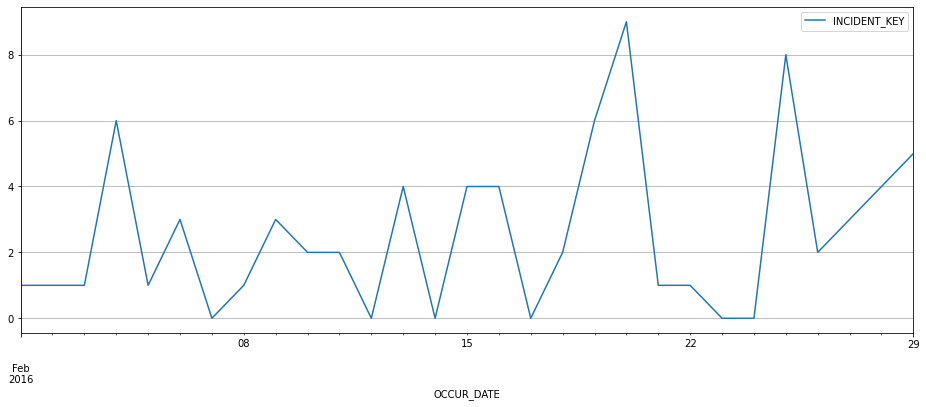

In [ ]:
#Month with coldest date
#Coldest date being 2016-02-14

pivot[minTempDate].plot(grid=True)

print(pivot[minTempDate].sum())

#Never reaching double digits and even had days of 0 incidents multiple times


INCIDENT_KEY    221.0
dtype: float64


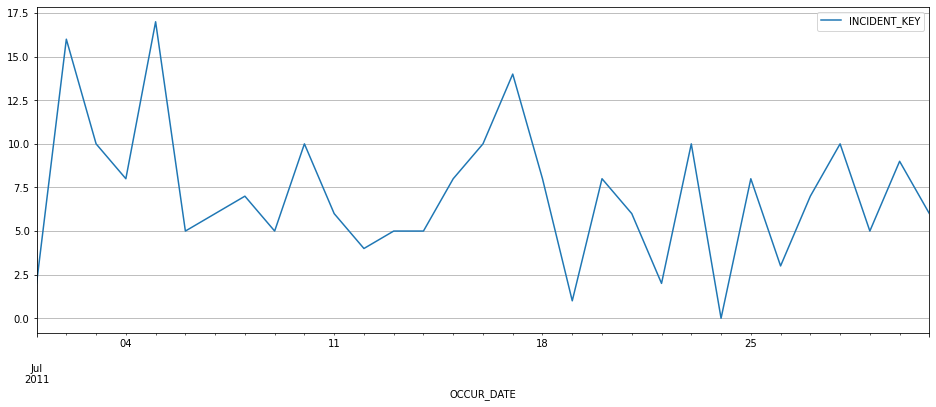

In [ ]:
#Month with hottest date
#Hottest date being 2011-07-22

print(pivot[maxTempDate].sum())

pivot[maxTempDate].plot(grid=True)

#Consistently peaking into double digits, as high as 17 shootings in a day.



INCIDENT_KEY    117.0
dtype: float64


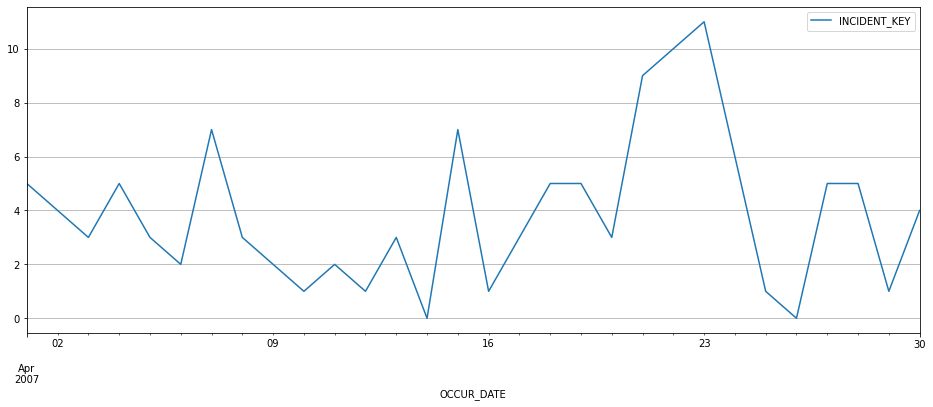

In [ ]:
#Month with most rain date
#Date with most rainfall being 2007-04-15

print(pivot[maxRainDate].sum())

pivot[maxRainDate].plot(grid=True)

In [ ]:
shTemp = pd.merge(pivot, tempData, left_index=True, right_index=True)

In [ ]:
shTemp

,INCIDENT_KEY,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN
2006-01-01,8.0,0.00,0.0,0.0,37.0,42,32
2006-01-02,4.0,0.63,0.0,0.0,43.5,48,39
2006-01-03,4.0,1.13,0.0,0.0,36.5,40,33
2006-01-04,4.0,0.00,0.0,0.0,33.5,38,29
2006-01-05,4.0,0.05,0.0,0.0,43.5,50,37
...,...,...,...,...,...,...,...
2020-12-27,6.0,0.00,0.0,0.0,30.5,37,24
2020-12-28,2.0,0.00,0.0,0.0,42.5,50,35
2020-12-29,5.0,0.00,0.0,0.0,36.5,43,30
2020-12-30,2.0,0.00,0.0,0.0,35.5,43,28


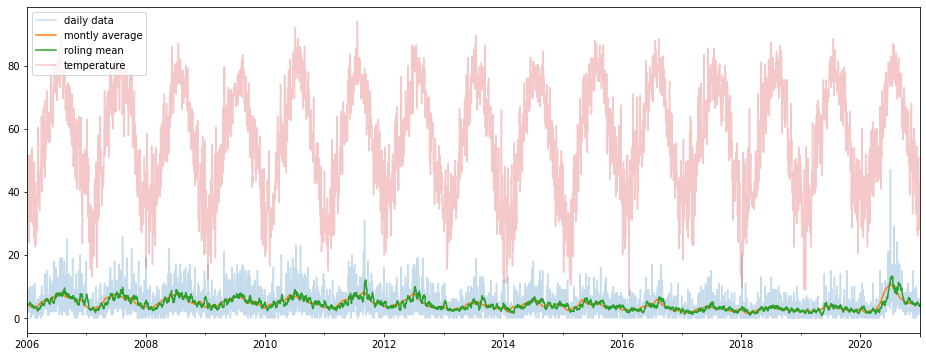

In [ ]:
ax = shTemp['INCIDENT_KEY'].plot(alpha=0.25)
shTemp['INCIDENT_KEY'].resample('M').mean().plot(ax=ax)
shTemp['INCIDENT_KEY'].rolling(15).mean().plot(ax=ax)
shTemp['TAVG'].plot(alpha=0.25,ax=ax)
ax.legend(["daily data", "montly average", "roling mean", "temperature"])
plt.show()

#2006-2020
#Too much data, not really observable. Can slightly see waves corresponding to temps
#but no real conclusions can be made

We can see below with 2006-2010 data, the incidents followed the trend of while it was warmer out, shooting incidents rose while when it was colder out, shooting incidents were less numerous. Whether this was a causation can not be determined, just a correlation. The question can still be asked whether the heat induces individuals to commit gun violence or the heat causes more people to be outside which then promotes more gun violence.

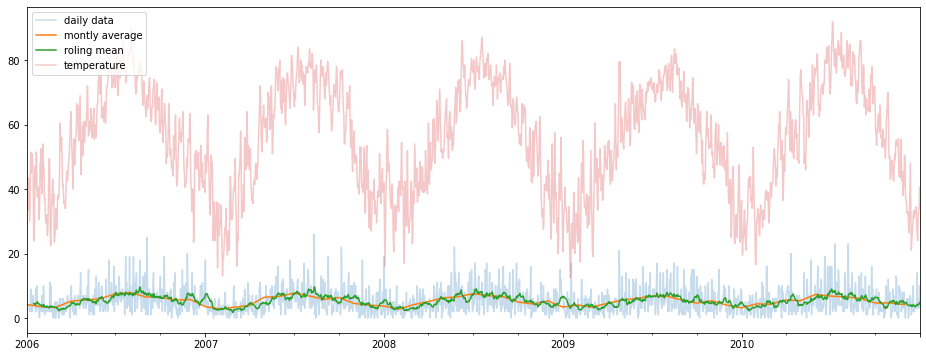

In [ ]:
ax = shTemp['INCIDENT_KEY']['2006':'2010'].plot(alpha=0.25)
shTemp['INCIDENT_KEY']['2006':'2010'].resample('M').mean().plot(ax=ax)
shTemp['INCIDENT_KEY']['2006':'2010'].rolling(15).mean().plot(ax=ax)
shTemp['TAVG']['2006':'2010'].plot(alpha=0.25,ax=ax)
ax.legend(["daily data", "montly average", "roling mean", "temperature"])
plt.show()

Unlike the incidents from 2006-2010, 2018-2020 incident counts did not follow temperature data as closely. Waves in this plot is almost indiscernable and shows a period of time of relatively low gun violence.

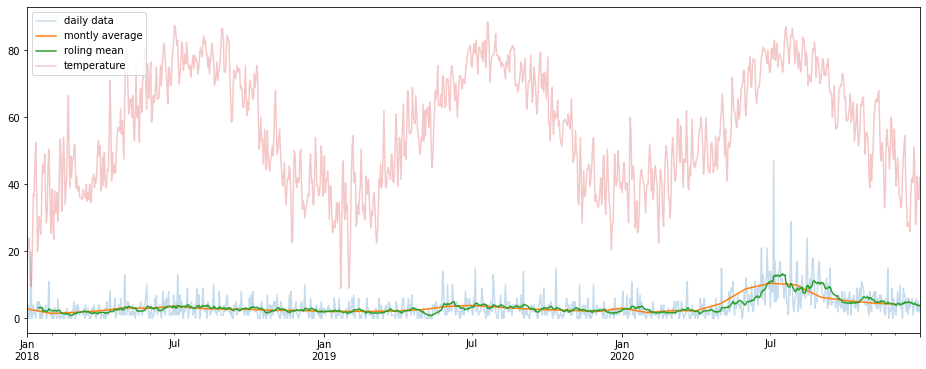

In [ ]:
ax = shTemp['INCIDENT_KEY']['2018':'2020'].plot(alpha=0.25)
shTemp['INCIDENT_KEY']['2018':'2020'].resample('M').mean().plot(ax=ax)
shTemp['INCIDENT_KEY']['2018':'2020'].rolling(15).mean().plot(ax=ax)
shTemp['TAVG']['2018':'2020'].plot(alpha=0.25,ax=ax)
ax.legend(["daily data", "montly average", "roling mean", "temperature"])
plt.show()

#2018-2020

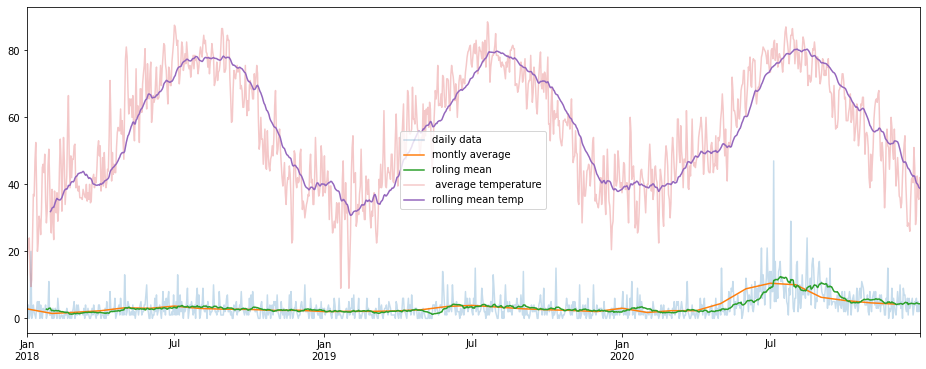

In [ ]:
ax = shTemp['INCIDENT_KEY']['2018':'2020'].plot(alpha=0.25)
shTemp['INCIDENT_KEY']['2018':'2020'].resample('M').mean().plot(ax=ax)
shTemp['INCIDENT_KEY']['2018':'2020'].rolling(25).mean().plot(ax=ax)
shTemp['TAVG']['2018':'2020'].plot(alpha=0.25,ax=ax)
shTemp['TAVG']['2018':'2020'].rolling(30).mean().plot(ax=ax)
ax.legend(["daily data", "montly average", "roling mean", " average temperature", "rolling mean temp"])
plt.show()

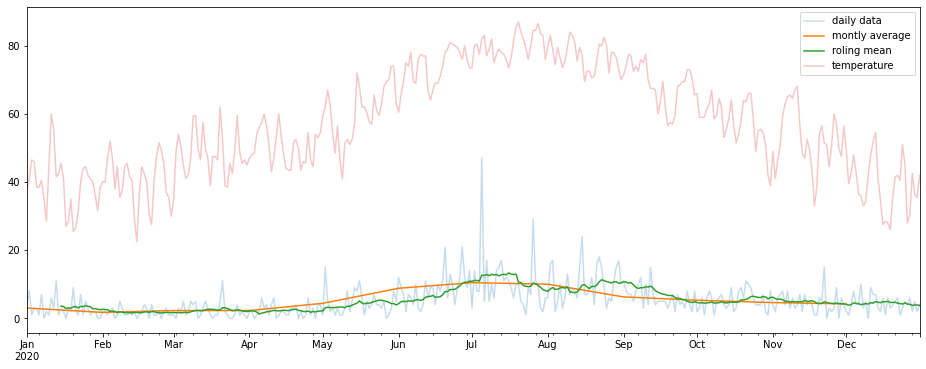

In [ ]:
ax = shTemp['INCIDENT_KEY']['2020'].plot(alpha=0.25)
shTemp['INCIDENT_KEY']['2020'].resample('M').mean().plot(ax=ax)
shTemp['INCIDENT_KEY']['2020'].rolling(15).mean().plot(ax=ax)
shTemp['TAVG']['2020'].plot(alpha=0.25,ax=ax)
ax.legend(["daily data", "montly average", "roling mean", "temperature"])
plt.show()

Taking the data from 2019 and 2020 and using decompose, we can see that there are constantly upwards and downwards trends throughout the year. There is the obvious consistantly long upward trend heading into July 2020 but since July there was a downward trend, never attaining that apex again. Overall, looking where the trend starts in January 2019 and ends in Dec 2020, the data ends at a higher point than where it began. 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<Figure size 1152x432 with 0 Axes>

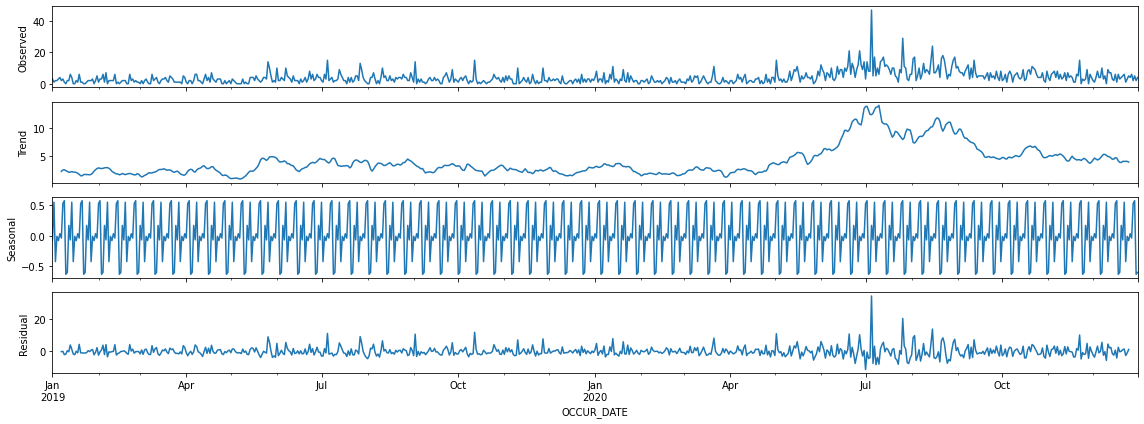

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose


decomposition = seasonal_decompose(pivot['2019':'2020'], model='additive', freq=12)  
fig = plt.figure()  
fig = decomposition.plot()

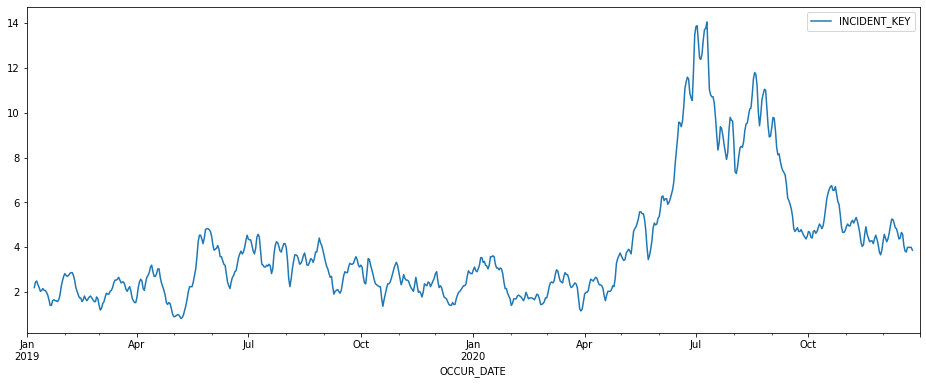

In [ ]:
decomposition.trend.plot()

In [ ]:
shapefiles_zipcodes = "http://www2.census.gov/geo/tiger/GENZ2017/shp/cb_2017_us_zcta510_500k.zip"

In [ ]:
!sudo pip3 install -U -qq geopandas fiona pyproj descartes pysal rtree scipy pykdtree pyepsg pillow OWSLib geoplot

In [ ]:
import geopandas as gpd

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [ ]:
df_zipcodes = gpd.read_file(shapefiles_zipcodes)

In [ ]:
df_zipcodes = df_zipcodes[ df_zipcodes.ZCTA5CE10 >='10001' ]  # New York
df_zipcodes = df_zipcodes[ df_zipcodes.ZCTA5CE10 <='11698' ]  # New York

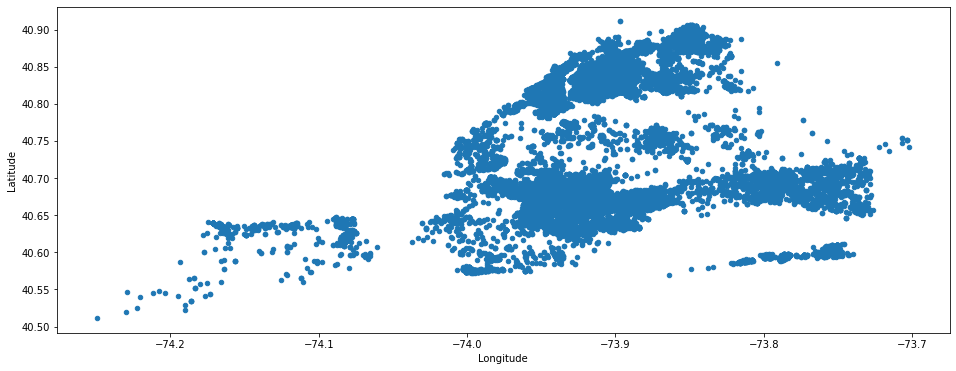

In [ ]:
data.plot(kind='scatter', y='Latitude', x ='Longitude')

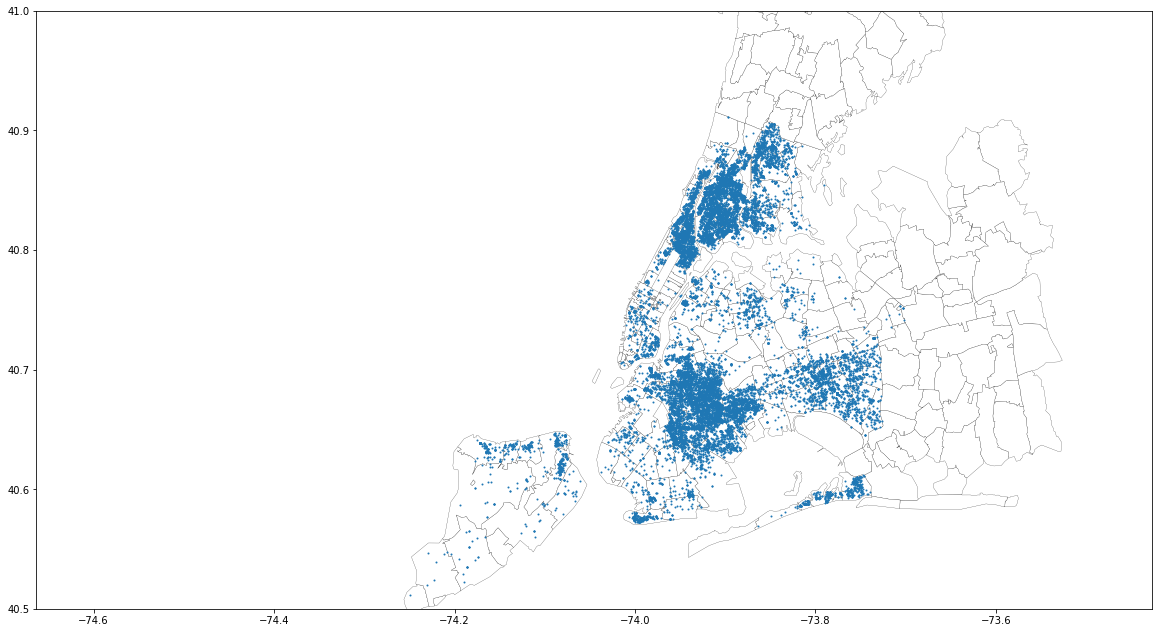

In [ ]:
ax1 = df_zipcodes.plot(
    figsize=(20,20), 
    linewidth=0.2, 
    color='white', 
    edgecolor='black'
)

ax1.set_ylim(40.5,41.0)

plt.scatter(data['Longitude'], data['Latitude'], s=1)
plt.show()

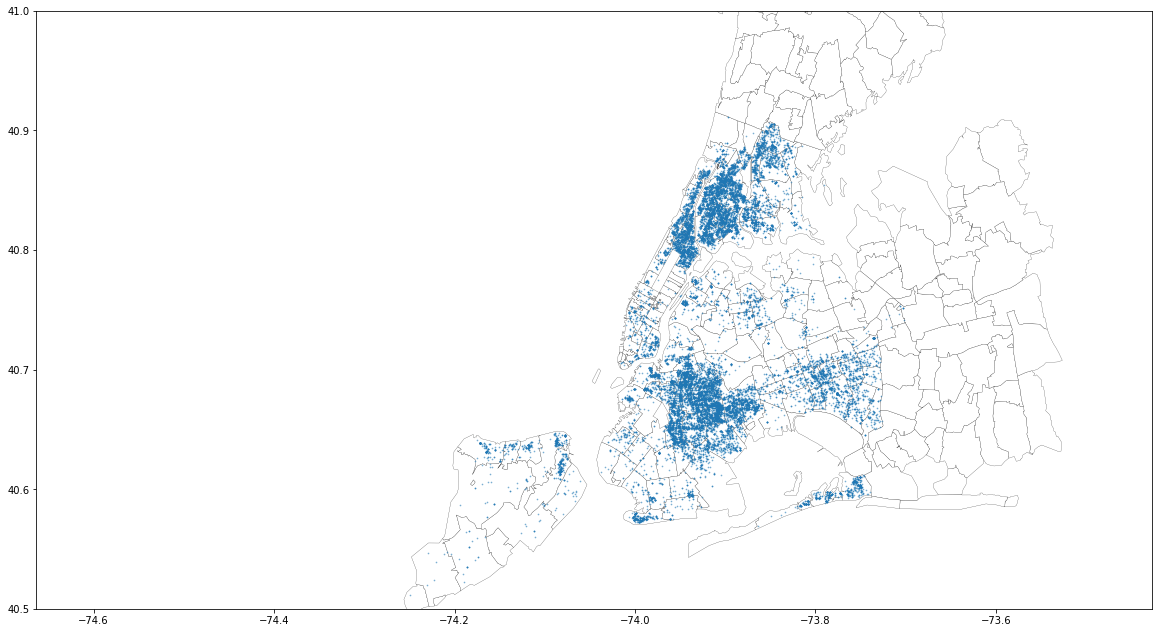

In [ ]:
ax1 = df_zipcodes.plot(
    figsize=(20,20), 
    linewidth=0.2, 
    color='white', 
    edgecolor='black'
)

ax1.set_ylim(40.5,41.0)

plt.scatter(data['Longitude'], data['Latitude'], s=0.5, alpha=0.5)
plt.show()

#Data from 2006 - 2020
#Same map as above, with different s and alpha values

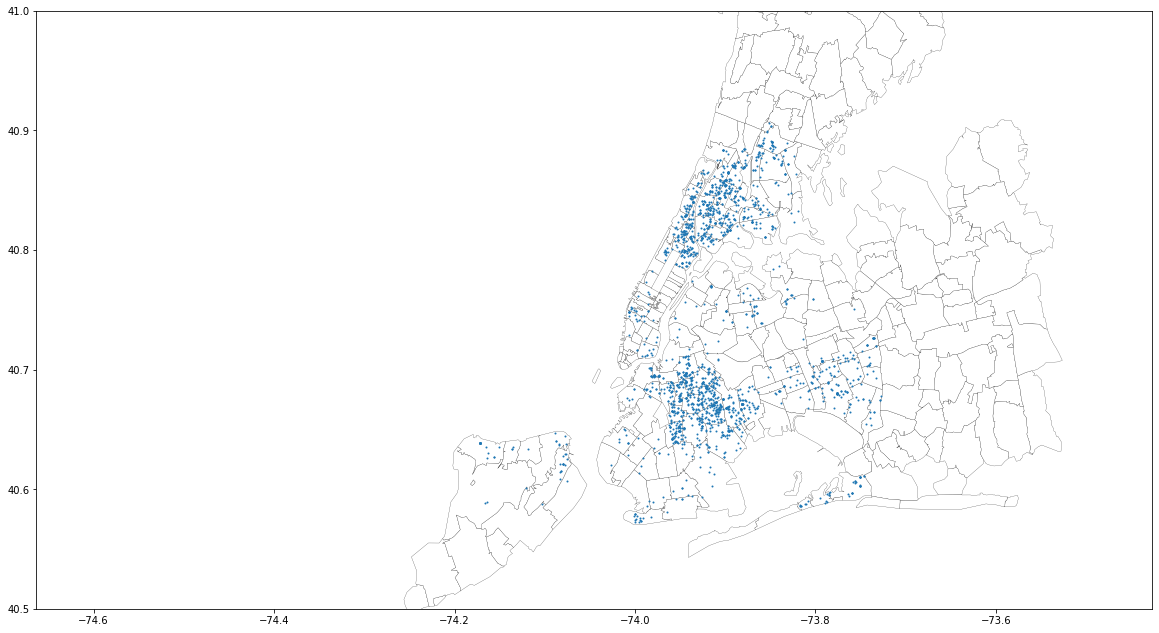

In [ ]:
#Now let's compare maps with data from 2006/2007 to maps from 2019/2020

ax1 = df_zipcodes.plot(
    figsize=(20,20), 
    linewidth=0.2, 
    color='white', 
    edgecolor='black'
)

ax1.set_ylim(40.5,41.0)
#2006 data maps
plt.scatter(data06['Longitude'], data06['Latitude'], s=1)
plt.show()



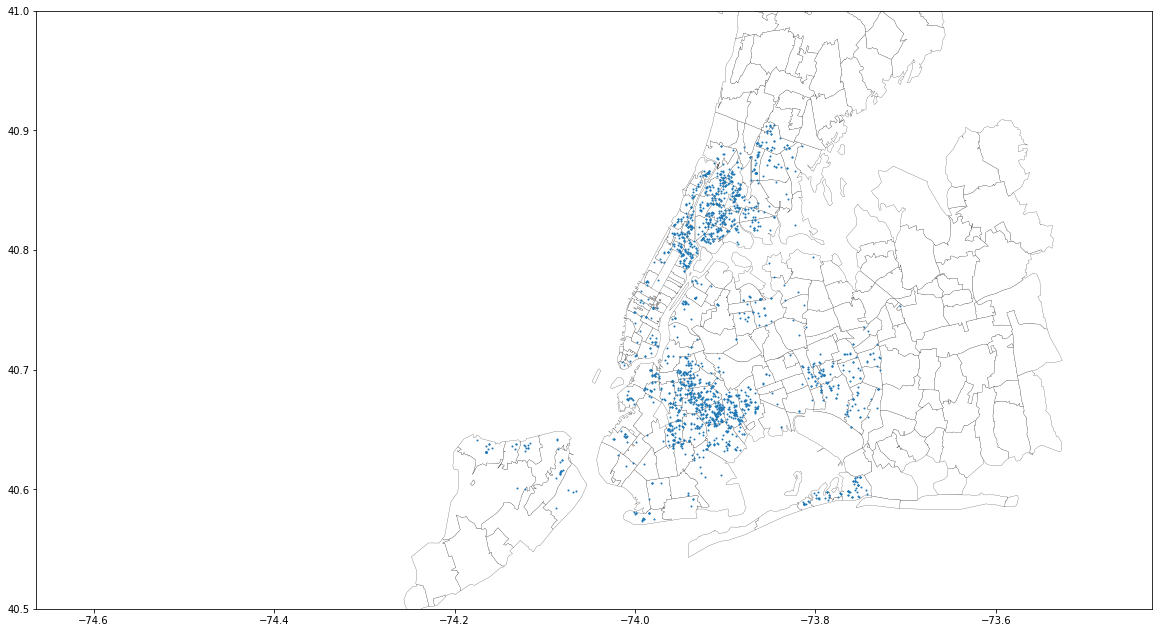

In [ ]:
ax1 = df_zipcodes.plot(
    figsize=(20,20), 
    linewidth=0.2, 
    color='white', 
    edgecolor='black'
)

ax1.set_ylim(40.5,41.0)
plt.scatter(data20['Longitude'], data20['Latitude'], s=1)
plt.show()

#2020 data map

The 2006 map and the 2020 map is very similar. The main density of shootings occur in the same areas around the city, even 14 years apart. I would like to expand on this project in the future with research on these neighborhoods like school funding and after school activities as well as expanding the data to be before 2006. This shows shootings in certain neighborhoods has been a problem for potentially decades, spanning generations.